# Complementing measurements
In the previous sections, we saw a couple of examples with different kinds of data and image features. Now it is time to put everything together. Here we definitely recommend using the `Project` classes. We will use the real data this time, so expect longer computation times. This first section will be a short recap of the previous chapter since we did not apply the steps to the real data yet.

## Setting up the project

In [1]:
from msi_workflow import get_project
import user_params

path_folder = user_params.path_folder_real_data  # feel free to replace this by your data

project = get_project(is_MSI=True, path_folder=path_folder)

In [2]:
project

path_folder: C:\Users\Yannick Zander\Promotion\Cariaco MSI 2024\490-495cm\2018_08_27 Cariaco 490-495 alkenones.i
d_folder: 2018_08_27 Cariaco 490-495 alkenones.d
mis_file: 2018_08_27 Cariaco 490-495 alkenones.mis
AgeModel_file: AgeModel.pickle
peaks_file: peaks.sqlite
Spectra_file: Spectra.hdf5
ImageClassified_file: ImageClassified.pickle
ImageROI_file: ImageROI.pickle
ImageSample_file: ImageSample.pickle
SampleImageHandlerMSI_file: SampleImageHandlerMSI.pickle
_is_laminated: True

## Setting the age model
Since it does not depend on any other objects, it is good to start with that

In [3]:
from msi_workflow import AgeModel

depth_span = (490, 495)

age_model = AgeModel(age=(0, 100), depth=depth_span)
project.age_model = age_model
project.set_depth_span(depth_span)
project.set_age_span()

print(project)

path_folder: C:\Users\Yannick Zander\Promotion\Cariaco MSI 2024\490-495cm\2018_08_27 Cariaco 490-495 alkenones.i
d_folder: 2018_08_27 Cariaco 490-495 alkenones.d
mis_file: 2018_08_27 Cariaco 490-495 alkenones.mis
AgeModel_file: AgeModel.pickle
peaks_file: peaks.sqlite
Spectra_file: Spectra.hdf5
ImageClassified_file: ImageClassified.pickle
ImageROI_file: ImageROI.pickle
ImageSample_file: ImageSample.pickle
SampleImageHandlerMSI_file: SampleImageHandlerMSI.pickle
_is_laminated: True
_age_model: _save_file: None
path_folder: None
_in_file: None
column_depth: depth
column_age: age
df: Pandas DataFrame with columns [depth, age], indices [0, 1] and shape (2, 2)
depth_span: [490, 495]
age_span: [0.0, 100.0]


## Setting Images
Usually, it is more convenient to start with setting the images (`SampleImageHandler`, `ImageSample`, etc.)

In [4]:
overwrite_all = False
plts = False
%matplotlib inline

_ = project.require_image_handler(overwrite=overwrite_all or False, plts=plts)
_ = project.require_image_sample(overwrite=overwrite_all or False, plts=plts)
_ = project.require_image_roi(overwrite=overwrite_all or False, plts=plts)
_ = project.require_image_classified(overwrite=overwrite_all or False)

Let's check the results

In [5]:
if plts:
    project.image_handler.plot_overview()
    project.image_sample.plot_overview()
    project.image_roi.plot_overview()
    project.image_classified.plot_overview()

By the way, you can shortcut all the `require` calls with `project.require_images`.

## Setting X-ray
We will use the image from the X-ray chapter but initialize a new instance for the sake of this tutorial

In [6]:
project.require_xray(path_image_file=r'Data\MD_03_2621_480-510_sliced_1200dpi.tif')

obj_color: dark
_hw: [722, 2376]
_image: Numpy array of type uint8, with shape (722, 2376, 3)
path_folder: Data

## Setting Data
Ok, now for the real deal. If you did not evoke a hdf5 file yet, this step will take a while. Remember, that you can skip this 
* by always providing a `ReadBrukerMCF` instance when a reader is required by functions, but you will only save disk space, not time
* when you already saved a `Spectra` object

In [7]:
project.require_hdf_reader()

In [8]:
project.require_spectra(overwrite=False, plts=True)

path_folder: C:\Users\Yannick Zander\Promotion\Cariaco MSI 2024\490-495cm\2018_08_27 Cariaco 490-495 alkenones.i
d_folder: 2018_08_27 Cariaco 490-495 alkenones.d
_delta_mz: 0.0001
_indices: Numpy array of type int32, with shape (17118,)
_limits: Numpy array of type float64, with shape (2,)
_intensities: Numpy array of type float64, with shape (120002,)
_kernel_params: Numpy array of type float64, with shape (465, 3)
_peaks_is_side_peak: None
_peak_properties: prominences: [1.93047973e+07 7.31488332e+07 1.09504310e+08 1.77015543e+08
 3.63968797e+07 3.68501044e+07 9.84172617e+07 2.81776382e+09
 4.13403662e+07 8.39352612e+08 1.22698963e+10 4.13444128e+08
 1.04435066e+10 9.06461467e+07 2.27779057e+09 6.13632661e+08
 4.20420596e+08 8.41462741e+09 5.03129812e+08 1.18090116e+08
 8.22872068e+07 1.42613948e+09 3.27455544e+07 1.32127467e+08
 5.28158608e+07 3.46326416e+07 1.41050108e+08 1.05083743e+08
 3.58804368e+08 3.19258785e+07 1.34027854e+08 6.59109551e+07
 2.31494408e+07 2.45167123e+08 2.70

Or, for exported txt files replace the cell above with `project.require_da_export()`

Alright, now let's set the data object:

In [9]:
project.require_data_object()

mis_file: 2018_08_27 Cariaco 490-495 alkenones.mis
path_folder: C:\Users\Yannick Zander\Promotion\Cariaco MSI 2024\490-495cm\2018_08_27 Cariaco 490-495 alkenones.i
d_folder: 2018_08_27 Cariaco 490-495 alkenones.d
_distance_pixels: 100.0
_feature_table: Pandas DataFrame with columns [548.0708, 548.0768, 548.0924, 548.1308, 548.1515, 548.1608, 548.1776, 548.1872, 548.2066, 548.2138, ...], indices [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, ...] and shape (17118, 469)

## Adding Image Attributes
Great! now we can combine the measurement with information from the images. But be careful with attributes from the `ImageClassified` class because it may have some distortion correction applied to it, we will show how to add that information later.

In [10]:
project.add_pixels_ROI()
project.add_photo()
project.add_holes()
project.add_light_dark_classification()

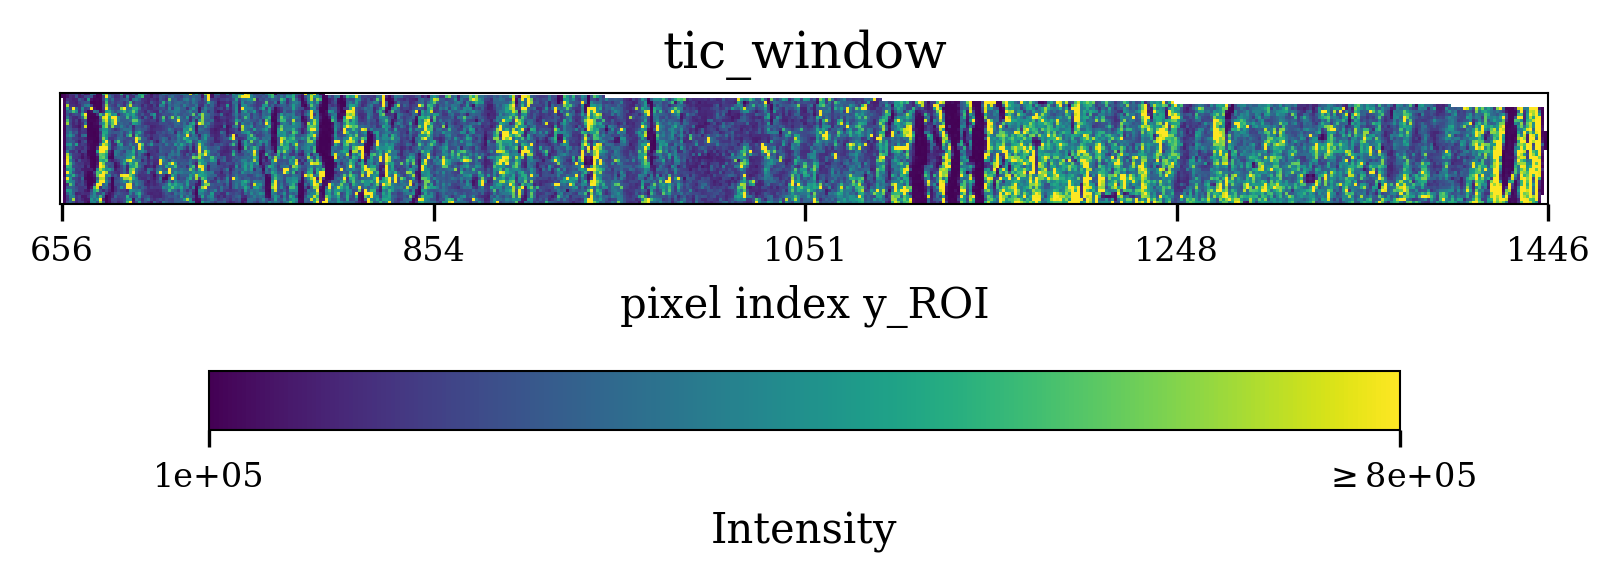

In [11]:
project.plot_comp('tic_window', 'data_object')

## Adding other information
While we are at it, let's also add the total ion count recorded during the acquisition (not the one calculated by the Spectra object which only considers ions within the QTOF window 

In [12]:
project.add_tic()

In [13]:
# project.plot_comp('tic', 'data_object')

and it can also be handy to have some depth and age information for each pixel:

In [14]:
# exclude_gaps will skip rows in the image where no sediment is found
project.add_depth_column(exclude_gaps=True)
# using the age model, we can assign an age to each depth
project.add_age_column()

## Setting punch-holes
For some methods it is necessary to define the punch holes to define pairs of teaching points, so let's do that here

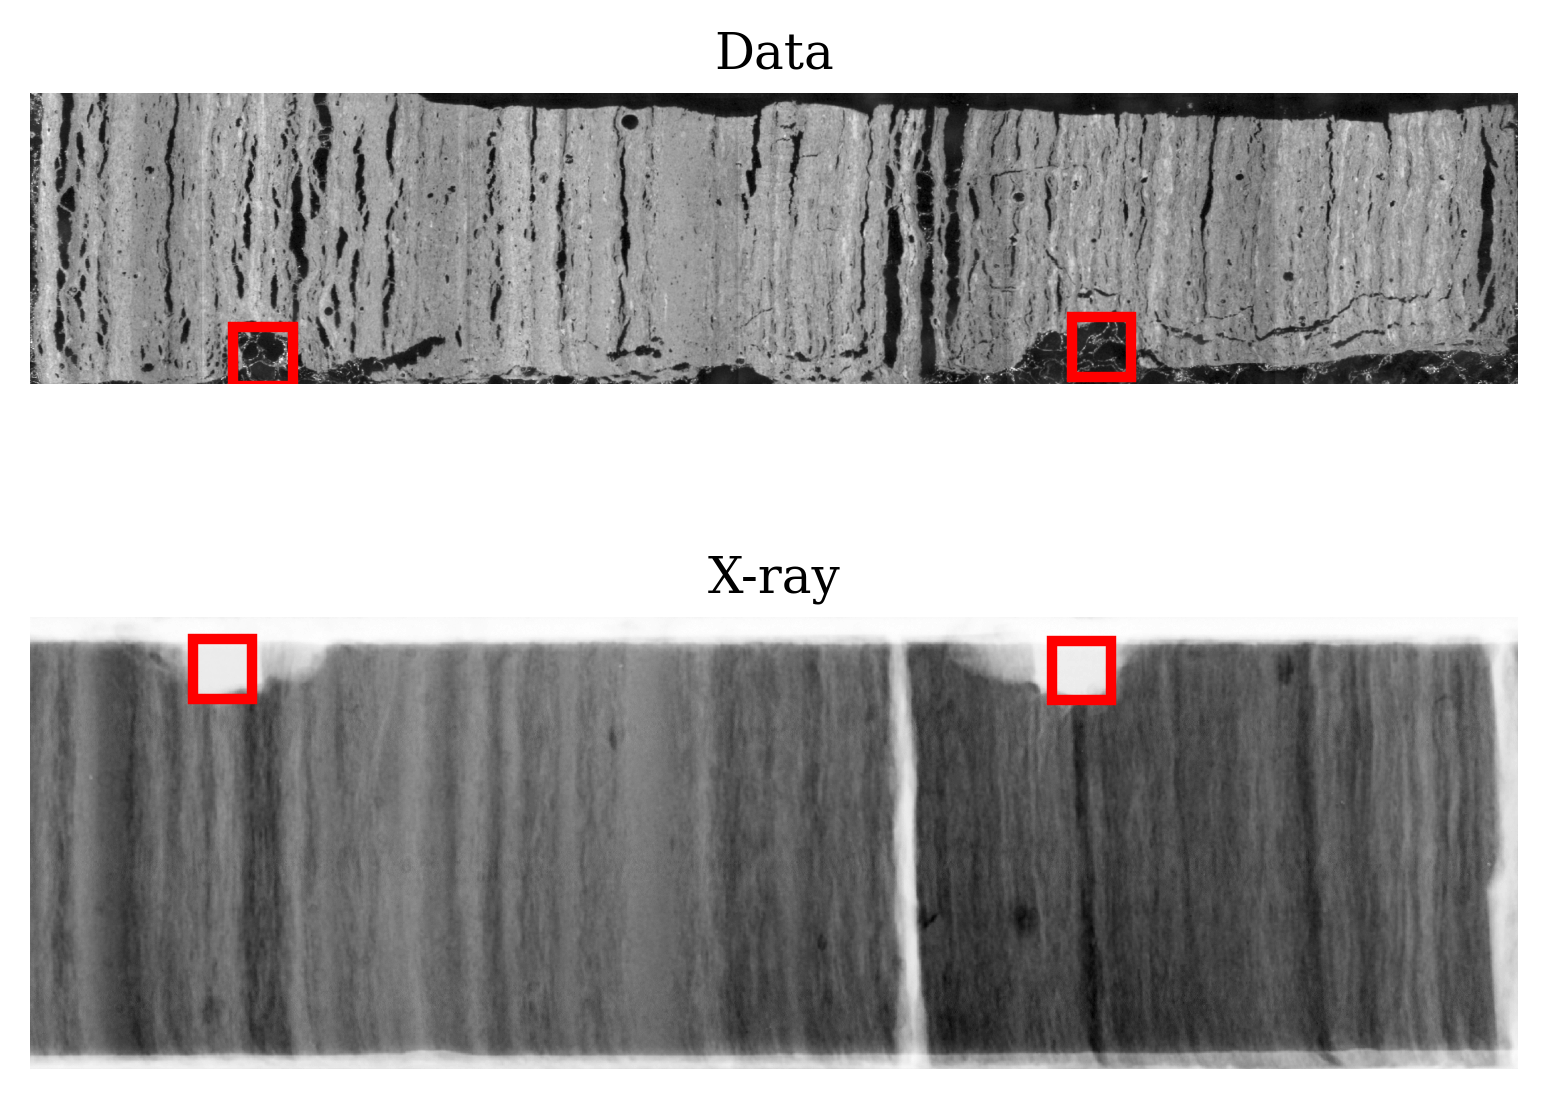

In [15]:
project.set_punchholes(plts=False, overwrite_data=True)
project.plot_punchholes()

## Adding features using transformations
So far, adding features has been pretty straightforward since we could almost use one-to-one mappings. For the next few features, however, we will have to transform at least one of our datasets in a non-trivial manner.

### Add X-ray
First, we need to define a transformation. For this, three options are available
* `method='punchholes'` will use the punch holes set on the MSI and X-ray photo and perform an affine transformation to map the X-ray onto the MSI image
* `method='bounding_box'` will use sample extents and perform a perspective transformation to map the corners of the X-ray bounding rectangle to that of the MSI sample
* `method='punchholes'` with `is_piecewise=True` is the default option. This will perform a piece-wise linear transformation using both the punch holes and the corners of bounding boxes. Since deformations through entire pieces are most likely non-linear this is the best estimate. Let's explore our 

In [16]:
# project.set_xray_transform(method='bounding_box', plts=True)

We can see that we need to mirror the X-ray image over the horizontal axis

In [17]:
# project.set_xray_transform(method='bounding_box', flip_xray=True, plts=True)

Now the bottom left area is not aligned very well. Let's see if the punch holes are doing a better job.

In [18]:
# project.set_xray_transform(method='punchholes', plts=True, is_piecewise=False)

Here it seems like the left side of our sample got stretched. Maybe a piecewise linear transformation can take care of that

In [19]:
_ = project.require_xray_transform(method='punchholes', plts=True, is_piecewise=True)

Now, as you can see, the bottom section of the X-ray is quite skewed. In this case I would probably still stick to the piece-wise linear transformation because overall it is likely more accurate than the affine transformation. Another option would be to set teaching points manually with [msiAlign](https://github.com/weimin-liu/msiAlign) and use the `set_punchholes_from_msi_align` method. But for the purposes of this tutorial this suffices, so let's finally add our transformed X-ray image to the MSI data

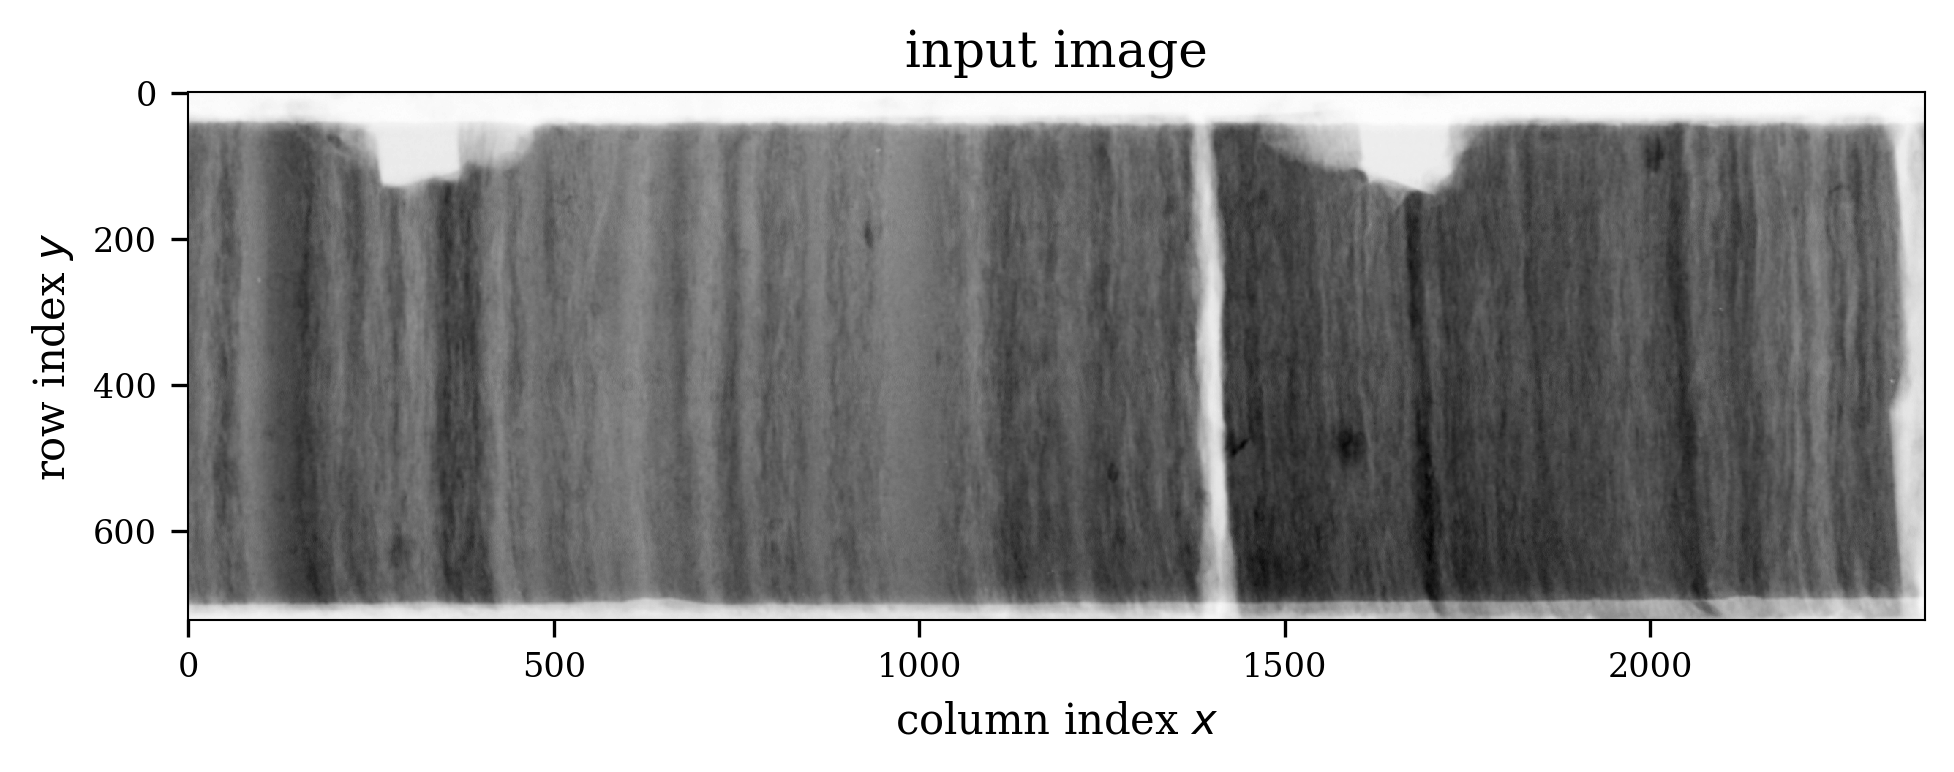

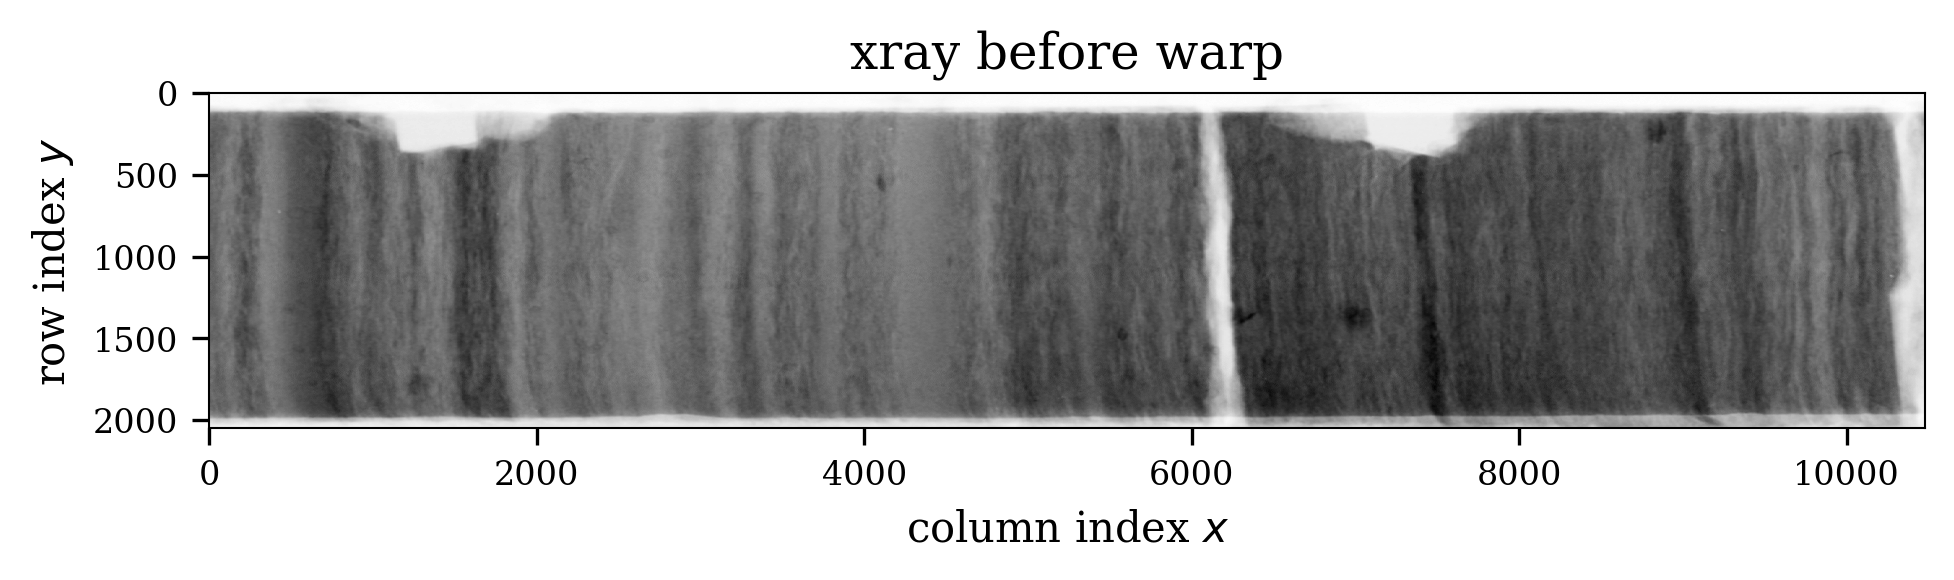

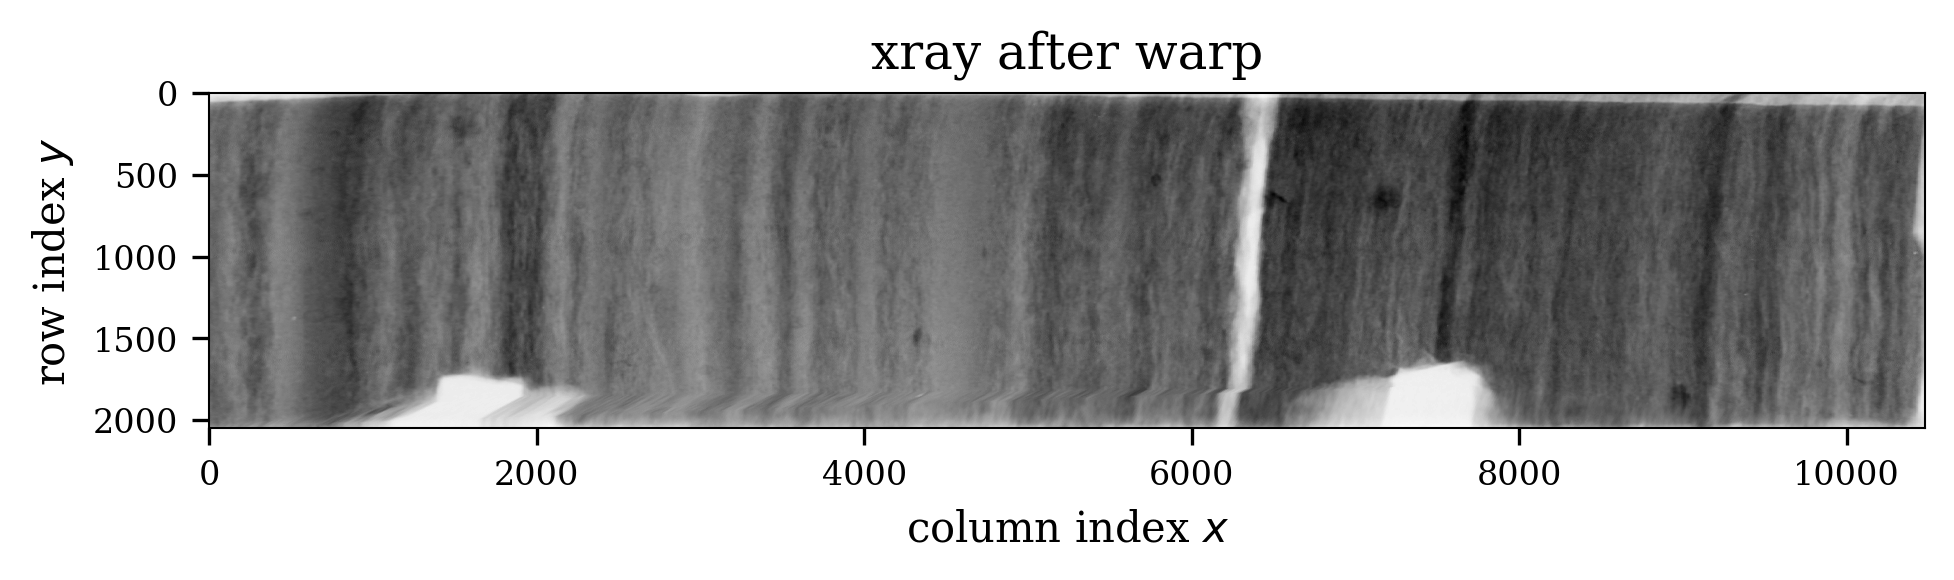

In [20]:
project.add_xray(plts=True)

By the way, the `set_xray_transform` method saves a mapper object, so the next time we can just use `require_xray_transform`.

### Add laminae classification
It is important to add this feature last since this will transform the MSI data itself. Also, it is worth considering if this feature is necessary at all. This transformation requires that ion images are interpolated, which will change the value distribution and may be undesirable for feature learning. For obtaining time series, on the other hand, this is less of an issue since binned values are unlikely to change much. 
#### Transform MSI using tilt correction
With this disclaimer in mind, let's move on and see what happens.

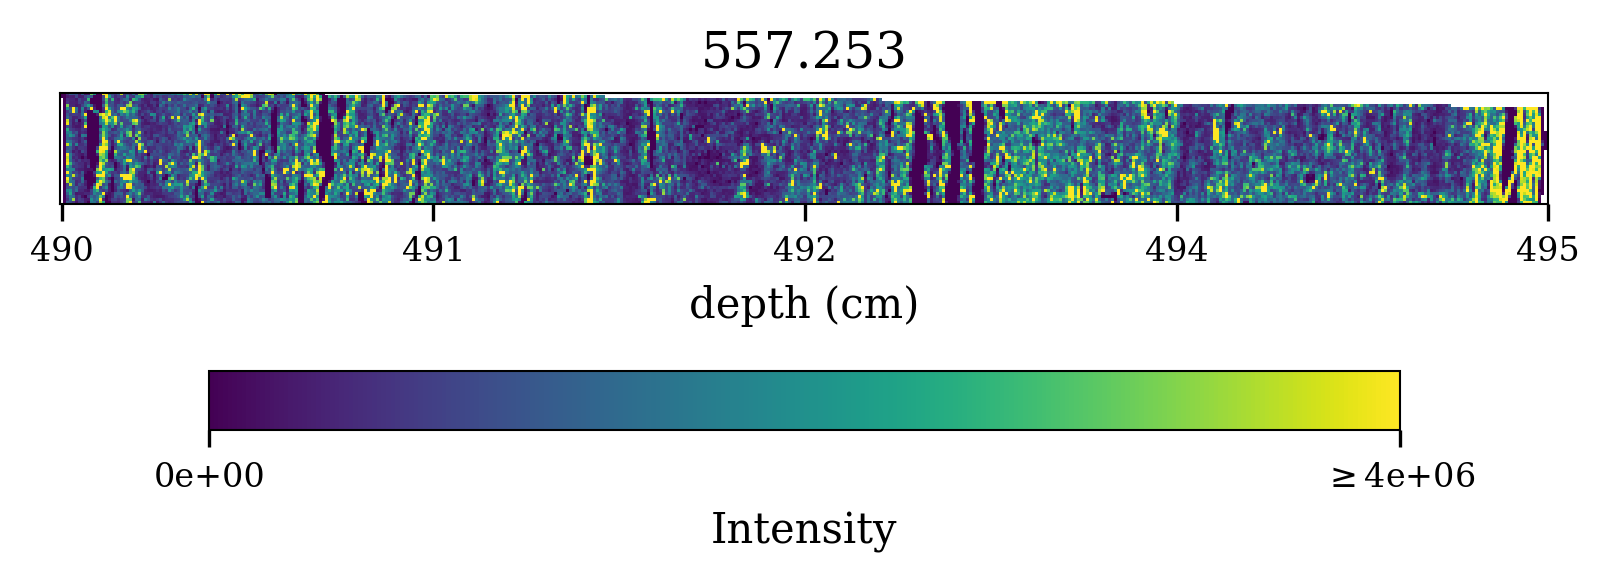

setting unique values: 100%|█████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 36.25it/s]


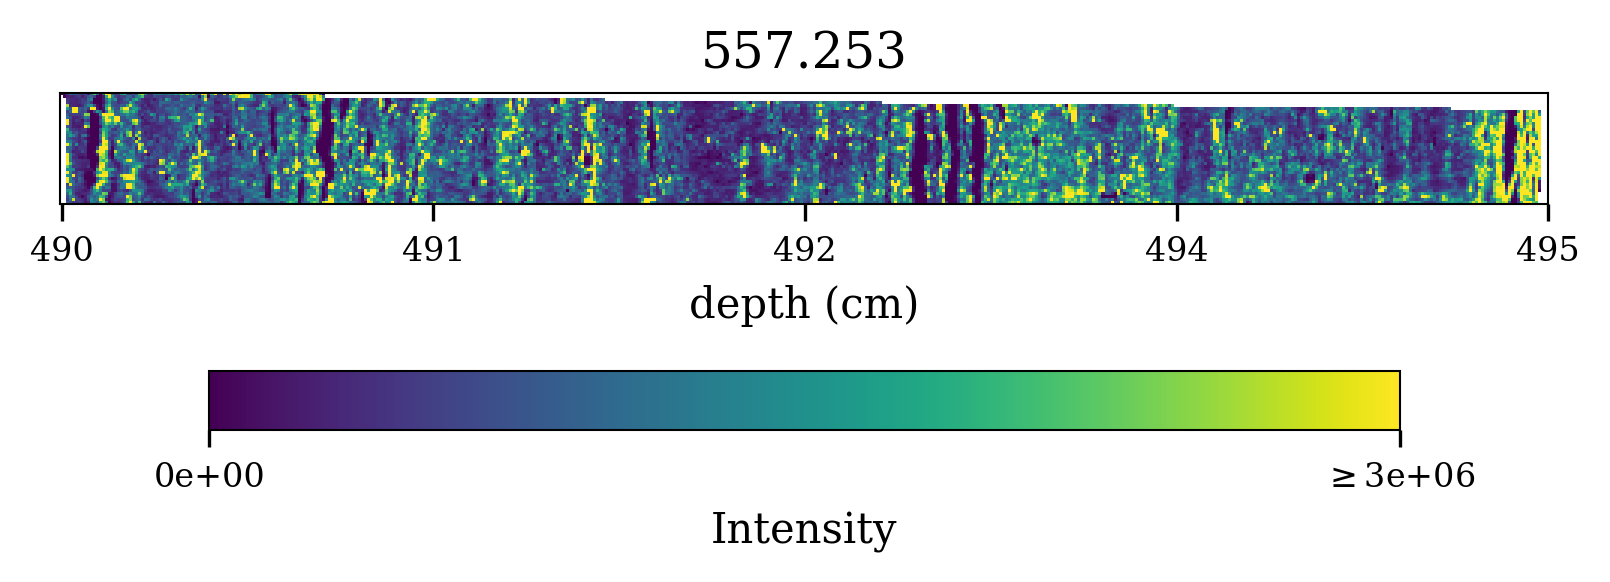

In [21]:
from msi_workflow.res.compound_masses import mass_pyropheophorbide_a_Na_p
project.plot_comp(mass_pyropheophorbide_a_Na_p, 'data_object')
project.data_object_apply_tilt_correction()
project.add_laminae_classification()
project.plot_comp(mass_pyropheophorbide_a_Na_p, 'data_object')

You can defently notice some differences and also notice that the maximum intensity dropped significantly. But we now have the laminae classification inside the feature table and are ready to reduce our ion images to time series

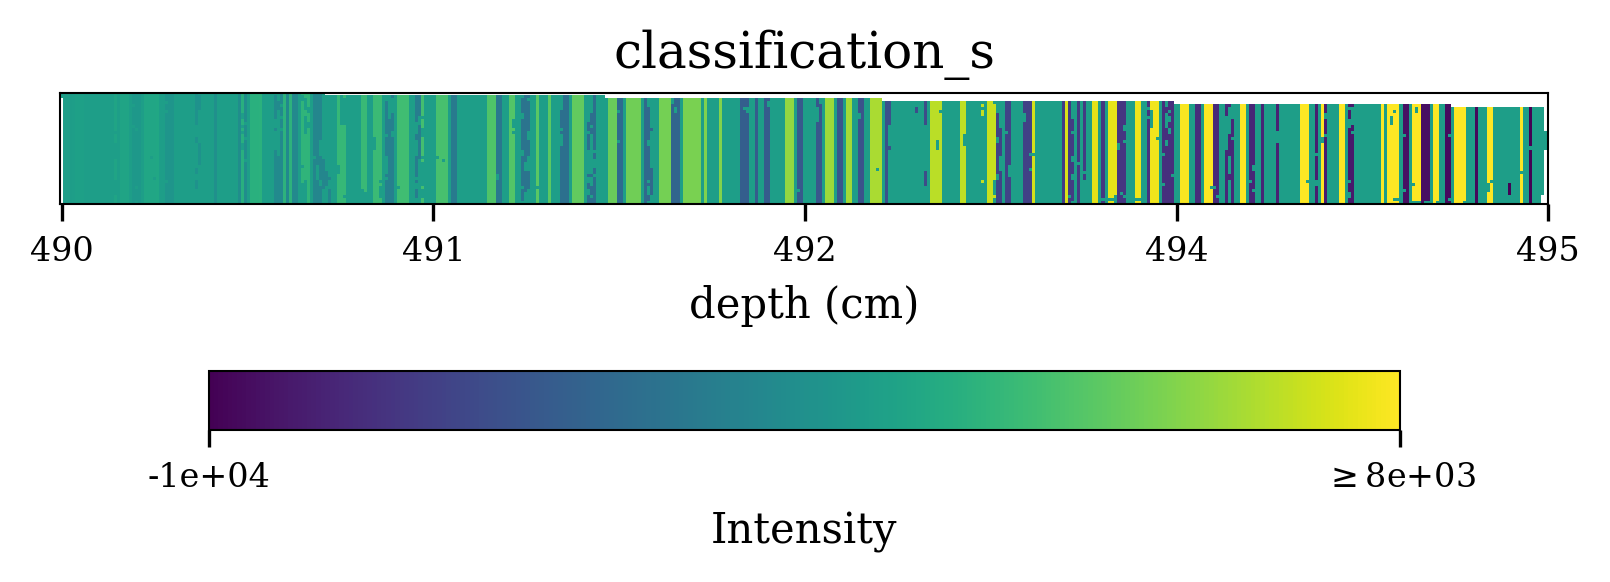

In [23]:
project.plot_comp('classification_s', 'data_object')
project.data_object.save()